<h1>Nama&nbsp;: Ilham Aryasuta Jatinugroho
<br>NIM&nbsp;&nbsp;&nbsp;&nbsp;: 16/398510/PA/17471</h1>

Embedding GloVe Twitter diambil dari https://nlp.stanford.edu/projects/glove/

In [1]:
from gensim.models import Word2Vec, KeyedVectors
import pandas as pd
import nltk
import numpy as np

# 1. Membuat Model Word2Vec Sendiri

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ilham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv('reddit_worldnews_start_to_2016-11-22.csv')

In [4]:
df.head(10)

,time_created,date_created,up_votes,down_votes,title,over_18,author,subreddit
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
5,1201287889,2008-01-25,15,0,Hay presto! Farmer unveils the illegal mock-...,False,Armagedonovich,worldnews
6,1201289438,2008-01-25,5,0,"Strikes, Protests and Gridlock at the Poland-U...",False,Clythos,worldnews
7,1201536662,2008-01-28,0,0,The U.N. Mismanagement Program,False,Moldavite,worldnews
8,1201558396,2008-01-28,4,0,Nicolas Sarkozy threatens to sue Ryanair,False,Moldavite,worldnews
9,1201635869,2008-01-29,3,0,US plans for missile shields in Polish town me...,False,JoeyRamone63,worldnews


In [5]:
newsTitles = df["title"].values

In [6]:
newsTitles

array(['Scores killed in Pakistan clashes',
       'Japan resumes refuelling mission',
       'US presses Egypt on Gaza border', ...,
       'Professor receives Arab Researchers Award',
       'Nigel Farage attacks response to Trump ambassador tweet',
       'Palestinian wielding knife shot dead in West Bank: Israel police'],
      dtype=object)

In [7]:
newsVec = []
for title in newsTitles:
    newsVec.append(nltk.word_tokenize(title))

In [8]:
model = Word2Vec(newsVec, min_count=1,size=32)

In [9]:
model.save("reddit.model")

In [10]:
model.wv["king"]

array([ 1.0802166 , -0.8754625 , -1.394411  , -1.9680673 ,  0.22022603,
        1.1053541 ,  1.8044529 ,  2.0753267 ,  2.4546452 ,  0.93615603,
       -0.53171223, -3.384746  ,  0.63619214, -0.5379687 ,  1.7300788 ,
        2.8300922 ,  0.02783678,  2.0340958 ,  0.5043185 ,  0.99088717,
       -0.7384087 , -0.29582584, -0.652829  , -1.2004216 , -1.4965041 ,
        1.4470125 , -2.654463  ,  1.0172923 ,  3.1652625 , -0.25387323,
        1.1056013 , -1.9410018 ], dtype=float32)

In [11]:
model.wv.most_similar("king")

[('prince', 0.8718553781509399),
 ('King', 0.8207074403762817),
 ('monarchy', 0.7914791107177734),
 ('cleric', 0.7522376179695129),
 ('politician', 0.7492087483406067),
 ('princess', 0.7419430017471313),
 ('blogger', 0.7213940620422363),
 ('lawyer', 0.7150611877441406),
 ('writer', 0.7075344324111938),
 ('president', 0.707442581653595)]

In [12]:
vec = model.wv["king"] - model.wv["man"] + model.wv["woman"]
model.wv.most_similar([vec])

[('king', 0.944716215133667),
 ('prince', 0.823829710483551),
 ('monarchy', 0.7913088798522949),
 ('King', 0.7755643129348755),
 ('cleric', 0.7652396559715271),
 ('politician', 0.7518307566642761),
 ('blogger', 0.7392491102218628),
 ('princess', 0.720544695854187),
 ('royal', 0.7062225341796875),
 ('prosecutor', 0.6962375640869141)]

In [13]:
model.wv.save_word2vec_format(fname='Reddit-WorldNews-32.bin',binary=True)

In [14]:
model = model.wv

# 2. Mempersiapkan Pre-trained Model

In [15]:
model2 = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True,limit=1000000)

In [16]:
vec = model2["king"] - model2["man"] + model2["woman"]
model2.most_similar([vec])

[('king', 0.8449392914772034),
 ('queen', 0.7300516366958618),
 ('monarch', 0.6454660892486572),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676948547363),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663196563721),
 ('sultan', 0.5376776456832886),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]

In [17]:
vec = model2["football"] - model2["ball"]
model2.most_similar([vec])

[('football', 0.4854177236557007),
 ('Football', 0.3731251358985901),
 ('sports', 0.36936503648757935),
 ('footbal', 0.3609554171562195),
 ('Football_League', 0.3561263680458069),
 ('soccer', 0.3416219651699066),
 ('athletics', 0.32253068685531616),
 ('footballing', 0.29705876111984253),
 ('NFL', 0.2950764000415802),
 ('hockey', 0.2935287058353424)]

In [18]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.scripts.glove2word2vec import glove2word2vec

In [19]:
#gloveDat = datapath()
tmpDat = get_tmpfile('test1.txt')
_ = glove2word2vec('glove.twitter.27B.50d.txt', tmpDat)
model3 = KeyedVectors.load_word2vec_format(tmpDat)
model3.save_word2vec_format(fname='glove-twitter-50.bin',binary=True)

In [20]:
tmpDat = get_tmpfile('test2.txt')
_ = glove2word2vec('glove.twitter.27B.100d.txt', tmpDat)
model4 = KeyedVectors.load_word2vec_format(tmpDat)
model4.save_word2vec_format(fname='glove-twitter-100.bin',binary=True)

In [21]:
#test playground
enas = 2 * np.random.rand(100,) - 1
print(enas.shape)

(100,)


Model 1 (32 Dim)&nbsp;&nbsp;&nbsp;&nbsp;: w2v model buatan sendiri<br>
Model 2 (300 Dim)&nbsp;&nbsp;: w2v model dari google news<br>
Model 3 (50 Dim)&nbsp;&nbsp;&nbsp;&nbsp;: w2v model dari GloVe Twitter<br>
Model 4 (100 Dim)&nbsp;&nbsp;: w2v model dari GloVe Twitter

# 3. Menyiapkan data Train

In [22]:
import re
import tensorflow as tf
from nltk.tokenize import WordPunctTokenizer

In [23]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [24]:
def unknown():
    return 2 * np.random.rand(100,) - 1

In [25]:
tweets = df["text"].values
labels = df['airline_sentiment'].values
print (tweets[0:5])

['@VirginAmerica What @dhepburn said.'
 "@VirginAmerica plus you've added commercials to the experience... tacky."
 "@VirginAmerica I didn't today... Must mean I need to take another trip!"
 '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse'
 "@VirginAmerica and it's a really big bad thing about it"]


In [26]:
def clean_tweets(tweet):
    user_removed = re.sub(r'@','',tweet)
    link_removed = re.sub('https?://[A-Za-z0-9./]+','',user_removed)
    number_removed = re.sub("[^a-zA-Z0-9 ]", '', link_removed)
    lower_case_tweet= number_removed.lower()
    tok = WordPunctTokenizer()
    words = tok.tokenize(lower_case_tweet)
    clean_tweet = (' '.join(words)).strip()
    return clean_tweet

In [27]:
cleaned_tweets = []
for tweet in tweets:
    cleaned_tweets.append(clean_tweets(str(tweet)))
cleaned_tweets[0:5]

['virginamerica what dhepburn said',
 'virginamerica plus youve added commercials to the experience tacky',
 'virginamerica i didnt today must mean i need to take another trip',
 'virginamerica its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse',
 'virginamerica and its a really big bad thing about it']

In [28]:
len_tweet = []
tok = WordPunctTokenizer()
for tweet in cleaned_tweets:
    len_tweet.append(len(tok.tokenize(tweet)))
print("Panjang maximum twitter:",np.max(len_tweet))


Panjang maximum twitter: 35


In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(set(labels)))
print(list(le.classes_))
num_labels = le.transform(labels) 

['negative', 'neutral', 'positive']


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_tweets, num_labels, test_size=0.2, random_state=42)
print (len(X_train))

11712


In [31]:
print (len(X_test))

2928


In [32]:
print (set(y_train))

{0, 1, 2}


In [33]:
y_train = tf.keras.utils.to_categorical(y_train, 3)
y_test = tf.keras.utils.to_categorical(y_test, 3)

In [34]:
import collections
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import os
import random

In [36]:
t = tf.keras.preprocessing.text.Tokenizer()
t.fit_on_texts(np.array(X_train))

In [37]:
vocab_size = len(t.word_index) + 1

In [38]:
max_length = 35

In [39]:
encodedXTrain = t.texts_to_sequences(X_train)
encodedXTest = t.texts_to_sequences(X_test)
padXTrain = tf.keras.preprocessing.sequence.pad_sequences(encodedXTrain, maxlen=max_length, padding='post')
padXTest = tf.keras.preprocessing.sequence.pad_sequences(encodedXTest, maxlen=max_length, padding='post')
print('Train:')
print(padXTrain)
print('Test:')
print(padXTest)

Train:
[[    5     6    35 ...     0     0     0]
 [   17   219   505 ...     0     0     0]
 [   17   206     2 ...     0     0     0]
 ...
 [   16    45     9 ...     0     0     0]
 [    5    37 13693 ...     0     0     0]
 [   17   177   329 ...     0     0     0]]
Test:
[[ 16 217  11 ...   0   0   0]
 [ 12  62  14 ...   0   0   0]
 [ 17  58  14 ...   0   0   0]
 ...
 [ 12  13  48 ...   0   0   0]
 [ 16 206  37 ...   0   0   0]
 [ 16  72  72 ...   0   0   0]]


In [40]:
print(padXTrain.shape, y_train.shape)
print(padXTest.shape, y_test.shape)

(11712, 35) (11712, 3)
(2928, 35) (2928, 3)


# 4. Memproses Word2Vec Embedding Ke Model

In [41]:
def getEmbedVector(embedModel, word):
    embedVec = 2 * np.random.rand(embedModel.vector_size,) - 1
    if word in embedModel:
        embedVec = embedModel[word]
    return embedVec

In [42]:
print(getEmbedVector(model4, 'asddgadf'))

[-0.92753523 -0.85152748 -0.75676758 -0.0981951   0.23022432 -0.77990906
  0.52835157 -0.23790087 -0.85104881  0.18003324 -0.79103546 -0.06713658
 -0.96772328  0.38335794  0.0625603  -0.20364918 -0.92477411 -0.79505111
 -0.60947213 -0.55229337  0.97437257 -0.35420794 -0.69253183 -0.74127119
  0.65282941 -0.07515218 -0.44018714  0.09854379  0.6551715   0.36986889
  0.49590571 -0.80283133  0.37606813 -0.60076759  0.11206357  0.22073374
 -0.00163619 -0.24613984  0.05003798 -0.05534232  0.23690633  0.92261088
 -0.73414409 -0.96958061  0.21219007 -0.89397022  0.97278076  0.88937297
  0.30923185 -0.15508136  0.19523059 -0.32577878  0.72517446  0.98824217
  0.85125246 -0.94554781 -0.14653313 -0.40050802  0.35405146 -0.55439782
  0.23920663  0.89516542 -0.34236422  0.20483873  0.05982042  0.25211178
 -0.92293136  0.37096535  0.99269227 -0.50324993 -0.59195753 -0.51483966
  0.89514293  0.55374635 -0.09377647 -0.77195582 -0.23948283 -0.85201287
 -0.00286151 -0.04267012 -0.72696835  0.83857262 -0

In [43]:
def get_weight_matrix(embedModel, vocab):
    vSize = len(vocab) + 1
    weight_matrix = np.zeros((vSize, embedModel.vector_size))
    for word, i in vocab.items():
        weight_matrix[i] = getEmbedVector(embedModel, word)
    return weight_matrix

# 5. Membuat Model 1 RNN

In [44]:
embedding_vectors = get_weight_matrix(model, t.word_index)
embedding_layer = layers.Embedding(vocab_size, model.vector_size, weights=[embedding_vectors], input_length=max_length, trainable=False)

In [46]:
RNNModel = tf.keras.models.Sequential()

In [47]:
RNNModel.add(embedding_layer)
RNNModel.add(layers.SimpleRNN(128))
RNNModel.add(layers.Dense(3, activation='softmax'))
RNNModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 35, 32)            438208    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               20608     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 459,203
Trainable params: 20,995
Non-trainable params: 438,208
_________________________________________________________________


# 6. Compile Model

In [48]:
RNNModel.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.RMSprop(),
                metrics = ['accuracy'])

# 7. Training dan Eval Model

In [52]:
epochs = 50
batch_size = 64
history = RNNModel.fit(padXTrain, y_train, epochs = epochs, batch_size = batch_size,
                      validation_split=0.1)

Train on 10540 samples, validate on 1172 samples
Epoch 1/50
10540/10540 [==============================] - 5s 474us/sample - loss: 0.7238 - accuracy: 0.6852 - val_loss: 0.9063 - val_accuracy: 0.6442
Epoch 2/50
10540/10540 [==============================] - 5s 475us/sample - loss: 0.7049 - accuracy: 0.6929 - val_loss: 0.9180 - val_accuracy: 0.6246
Epoch 3/50
10540/10540 [==============================] - 5s 513us/sample - loss: 0.6852 - accuracy: 0.7041 - val_loss: 0.9552 - val_accuracy: 0.6109
Epoch 4/50
10540/10540 [==============================] - 5s 494us/sample - loss: 0.6630 - accuracy: 0.7192 - val_loss: 0.9637 - val_accuracy: 0.6092
Epoch 5/50
10540/10540 [==============================] - 5s 456us/sample - loss: 0.6488 - accuracy: 0.7229 - val_loss: 0.9462 - val_accuracy: 0.6519
Epoch 6/50
10540/10540 [==============================] - 5s 465us/sample - loss: 0.6222 - accuracy: 0.7293 - val_loss: 0.9793 - val_accuracy: 0.6024
Epoch 7/50
10540/10540 [===========================

In [53]:
accr = RNNModel.evaluate(padXTest, y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2928/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test set
  Loss: 1.679
  Accuracy: 0.563


# 8. Plot Grafik

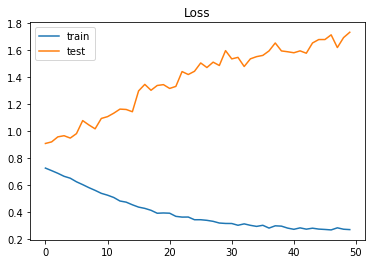

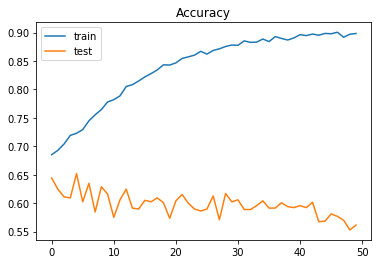

In [56]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

## Kesimpulan Model RNN dengan embedding reddit 32 dimensi:
Embedding model 1 menggunakan word2vec training sendiri dengan corpus reddit worldnews
hasil menunjukkan model NN yang sangat overfit dan akurasi yang lebih rendah dibandingkan tanpa word2vec embedding


# 9. Membuat Model 2 RNN

In [60]:
embedding_vectors = get_weight_matrix(model2, t.word_index)
embedding_layer = layers.Embedding(vocab_size, model2.vector_size, weights=[embedding_vectors], input_length=max_length, trainable=False)

In [61]:
RNNModel = tf.keras.models.Sequential()

In [62]:
RNNModel.add(embedding_layer)
RNNModel.add(layers.SimpleRNN(128))
RNNModel.add(layers.Dense(3, activation='softmax'))
RNNModel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 35, 300)           4108200   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               54912     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 4,163,499
Trainable params: 55,299
Non-trainable params: 4,108,200
_________________________________________________________________


# 10. Compile Model 2

In [63]:
RNNModel.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.RMSprop(),
                metrics = ['accuracy'])

# 11. Training dan Eval Model 2

In [64]:
epochs = 50
batch_size = 64
history = RNNModel.fit(padXTrain, y_train, epochs = epochs, batch_size = batch_size,
                      validation_split=0.1)

Train on 10540 samples, validate on 1172 samples
Epoch 1/50
10540/10540 [==============================] - 8s 713us/sample - loss: 0.8785 - accuracy: 0.6294 - val_loss: 0.7906 - val_accuracy: 0.6510
Epoch 2/50
10540/10540 [==============================] - 6s 560us/sample - loss: 0.7551 - accuracy: 0.6900 - val_loss: 0.7484 - val_accuracy: 0.6920
Epoch 3/50
10540/10540 [==============================] - 6s 589us/sample - loss: 0.7081 - accuracy: 0.7079 - val_loss: 0.8579 - val_accuracy: 0.5939
Epoch 4/50
10540/10540 [==============================] - 6s 589us/sample - loss: 0.6723 - accuracy: 0.7269 - val_loss: 0.7674 - val_accuracy: 0.6920
Epoch 5/50
10540/10540 [==============================] - 6s 561us/sample - loss: 0.6490 - accuracy: 0.7391 - val_loss: 0.6879 - val_accuracy: 0.7304
Epoch 6/50
10540/10540 [==============================] - 6s 551us/sample - loss: 0.6056 - accuracy: 0.7562 - val_loss: 0.7334 - val_accuracy: 0.7193
Epoch 7/50
10540/10540 [===========================

In [65]:
accr = RNNModel.evaluate(padXTest, y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2928/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test set
  Loss: 1.477
  Accuracy: 0.714


# 12. Plot Grafik

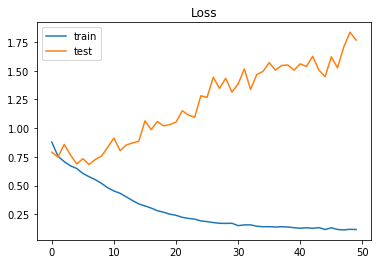

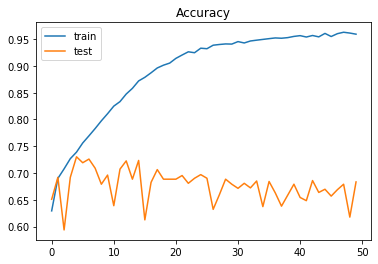

In [66]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

## Kesimpulan Model RNN dengan embedding pre-trained Google News 300 dimensi:
Embedding model 2 menggunakan word2vec pre-trained dengan data dari Google News
hasil menunjukkan model NN yang sangat overfit dan akurasi yang sedikit lebih rendah dibandingkan tanpa word2vec embedding
dan lebih bagus dari NN yang menggunakan word2vec embedding reddit

# 13. Membuat Model 3 RNN

In [67]:
embedding_vectors = get_weight_matrix(model3, t.word_index)
embedding_layer = layers.Embedding(vocab_size, model3.vector_size, weights=[embedding_vectors], input_length=max_length, trainable=False)

In [68]:
RNNModel = tf.keras.models.Sequential()

In [69]:
RNNModel.add(embedding_layer)
RNNModel.add(layers.SimpleRNN(128))
RNNModel.add(layers.Dense(3, activation='softmax'))
RNNModel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 35, 50)            684700    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 128)               22912     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 707,999
Trainable params: 23,299
Non-trainable params: 684,700
_________________________________________________________________


# 14. Compile Model 3

In [70]:
RNNModel.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.RMSprop(),
                metrics = ['accuracy'])

# 15. Training dan Eval Model 3

In [71]:
epochs = 50
batch_size = 64
history = RNNModel.fit(padXTrain, y_train, epochs = epochs, batch_size = batch_size,
                      validation_split=0.1)

Train on 10540 samples, validate on 1172 samples
Epoch 1/50
10540/10540 [==============================] - 7s 622us/sample - loss: 0.8622 - accuracy: 0.6280 - val_loss: 0.7973 - val_accuracy: 0.6792
Epoch 2/50
10540/10540 [==============================] - 5s 513us/sample - loss: 0.8201 - accuracy: 0.6676 - val_loss: 0.7933 - val_accuracy: 0.6408
Epoch 3/50
10540/10540 [==============================] - 6s 531us/sample - loss: 0.8618 - accuracy: 0.6333 - val_loss: 0.9357 - val_accuracy: 0.6152
Epoch 4/50
10540/10540 [==============================] - 5s 494us/sample - loss: 0.8264 - accuracy: 0.6510 - val_loss: 0.8241 - val_accuracy: 0.6630
Epoch 5/50
10540/10540 [==============================] - 5s 475us/sample - loss: 0.7640 - accuracy: 0.6845 - val_loss: 0.7562 - val_accuracy: 0.6852
Epoch 6/50
10540/10540 [==============================] - 6s 532us/sample - loss: 0.7606 - accuracy: 0.6907 - val_loss: 1.0015 - val_accuracy: 0.5700
Epoch 7/50
10540/10540 [===========================

In [72]:
accr = RNNModel.evaluate(padXTest, y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2928/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test set
  Loss: 0.630
  Accuracy: 0.766


# 16. Plot Grafik

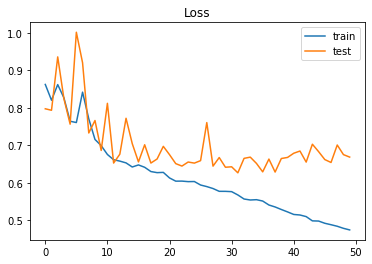

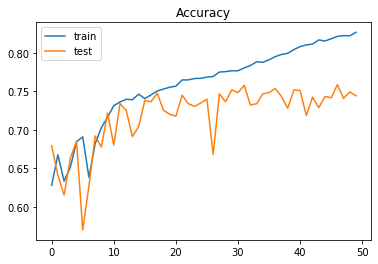

In [73]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

## Kesimpulan Model RNN dengan embedding pre-trained Twitter 50 dimensi:
Embedding model 3 menggunakan word2vec pre-trained dengan data dari Twitter yang sudah dilatih dengan menggunakan algoritma dari Global Vector (GloVe)
hasil menunjukkan model NN yang baik dan akurasi yang sedikit lebih tinggi dibandingkan tanpa word2vec embedding
dan lebih bagus dari NN yang menggunakan word2vec reddit ataupun google

Di sini mulai terlihat nilai loss yang menurun baik di train maupun test data

# 17. Membuat Model 4 RNN

In [74]:
embedding_vectors = get_weight_matrix(model4, t.word_index)
embedding_layer = layers.Embedding(vocab_size, model4.vector_size, weights=[embedding_vectors], input_length=max_length, trainable=False)

In [75]:
RNNModel = tf.keras.models.Sequential()

In [76]:
RNNModel.add(embedding_layer)
RNNModel.add(layers.SimpleRNN(128))
RNNModel.add(layers.Dense(3, activation='softmax'))
RNNModel.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 35, 100)           1369400   
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 128)               29312     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 1,399,099
Trainable params: 29,699
Non-trainable params: 1,369,400
_________________________________________________________________


# 18. Compile Model 4

In [77]:
RNNModel.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.RMSprop(),
                metrics = ['accuracy'])

# 19. Training dan Eval Model 4

In [78]:
epochs = 50
batch_size = 64
history = RNNModel.fit(padXTrain, y_train, epochs = epochs, batch_size = batch_size,
                      validation_split=0.1)

Train on 10540 samples, validate on 1172 samples
Epoch 1/50
10540/10540 [==============================] - 7s 650us/sample - loss: 0.8723 - accuracy: 0.6316 - val_loss: 0.9623 - val_accuracy: 0.6220
Epoch 2/50
10540/10540 [==============================] - 6s 522us/sample - loss: 0.8134 - accuracy: 0.6728 - val_loss: 0.8137 - val_accuracy: 0.6903
Epoch 3/50
10540/10540 [==============================] - 5s 503us/sample - loss: 0.7235 - accuracy: 0.6995 - val_loss: 0.7069 - val_accuracy: 0.7065
Epoch 4/50
10540/10540 [==============================] - 6s 551us/sample - loss: 0.7031 - accuracy: 0.7103 - val_loss: 0.8394 - val_accuracy: 0.6399
Epoch 5/50
10540/10540 [==============================] - 6s 522us/sample - loss: 0.6881 - accuracy: 0.7150 - val_loss: 0.6773 - val_accuracy: 0.7065
Epoch 6/50
10540/10540 [==============================] - 5s 503us/sample - loss: 0.6870 - accuracy: 0.7206 - val_loss: 0.6705 - val_accuracy: 0.7389
Epoch 7/50
10540/10540 [===========================

In [79]:
accr = RNNModel.evaluate(padXTest, y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2928/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test set
  Loss: 0.641
  Accuracy: 0.768


# 20. Plot Grafik

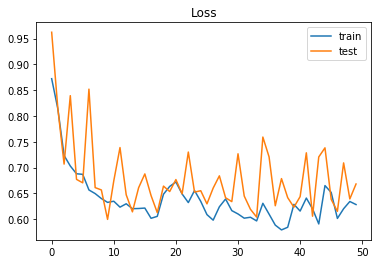

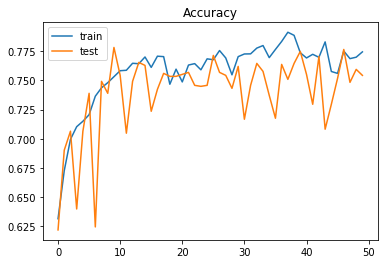

In [80]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

## Kesimpulan Model RNN dengan embedding pre-trained Twitter 100 dimensi:
Embedding model 4 menggunakan word2vec pre-trained dengan data dari Twitter yang sudah dilatih dengan menggunakan algoritma dari Global Vector (GloVe)
hasil menunjukkan model NN yang baik dan akurasi yang lebih tinggi dibandingkan tanpa word2vec embedding
dan lebih bagus dari NN yang menggunakan word2vec reddit, google, atau twitter 50 dimensi

Di sini grafik loss dan accuracy yang berdekatan yang menandakan NN yang baik walaupun akurasi tidak menyentuh 0.9

# 21. Kesimpulan

Dari keempat model embedding, terlihat bahwa model embedding yang menggunakan corpus Twitter menghasilkan akurasi yang lebih baik. Ini dikarenakan data yang kita train juga merupakan data dari Twitter yang berarti model embedding menggunakan data yang serupa.

Lalu dari 2 model embedding Twitter, embedding yang menggunakan 100 dimensi menghasilkan akurasi yang sedikit lebih bagus dibandingkan dengan yang menggunakan 50 dimensi. Ini mungkin terjadi karena nilai embedding vector yang lebih detail, walaupun terlihat akurasi training yang lebih rendah dibanding 50 dimensi.

Dari percobaan diatas dapat disimpulkan bahwa untuk mendapat hasil yang lebih bagus menggunakan word2vec embedding, embedding harus dilatih dengan corpus yang serupa, dalam hal ini adalah Tweet dari Twitter. Dan dimensi yang lebih banyak membuat hasil lebih akurat.